In [ ]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
from matplotlib import pyplot as plt 

In [ ]:
def convolve(image, K):
	# grab the spatial dimensions of the image and kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = K.shape[:2]

	# allocate memory for the output image, taking care to "pad"
	# the orders of the input image so the spatial size (i.e.,
	# width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top-to-bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplication between the ROI and
			# the kernel, the summing the matrix
			k = (roi * K).sum()

			# store the convolved value in the output (x, y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")

	# return the output image
	return output

In [ ]:
def apply_convolve_custom(image):
    # construct average blurring kernels used to smooth an image
    smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
    largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

    # construct a sharpening filter
    sharpen = np.array((
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]), dtype="int")

    # construct the Laplacian kernel used to detect edge-like
    # regions of an image
    laplacian = np.array((
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]), dtype="int")

    # construct the Sobel x-axis kernel
    sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")

    # construct the Sobel y-axis kernel
    sobelY = np.array((
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]), dtype="int")

    # construct an emboss kernel
    emboss = np.array((
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]), dtype="int")

    # construct the kernel bank, a list of kernels we're going to apply
    # using both our custom `convole` function and OpenCV's `filter2D`
    # function
    kernelBank = (
        ("small_blur", smallBlur),
        ("large_blur", largeBlur),
        ("sharpen", sharpen),
        ("laplacian", laplacian),
        ("sobel_x", sobelX),
        ("sobel_y", sobelY),
        ("emboss", emboss))

    # load the input image and convert it to grayscale
    image = cv2.imread(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # show the output images
    plt.figure()
    plt.axis("off")
    plt.title("Original")
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

    # loop over the kernels
    for (kernelName, K) in kernelBank:
        # apply the kernel to the grayscale image using both our custom
        # `convolve` function and OpenCV's `filter2D` function
        print("[INFO] applying {} kernel".format(kernelName))
        convolveOutput = convolve(gray, K)
        opencvOutput = cv2.filter2D(gray, -1, K)

        plt.figure()
        plt.axis("off")
        plt.title("{} - convolve".format(kernelName))
        plt.imshow(cv2.cvtColor(convolveOutput, cv2.COLOR_BGR2RGB))

        plt.figure()
        plt.axis("off")
        plt.title("{} - opencv".format(kernelName))
        plt.imshow(cv2.cvtColor(opencvOutput, cv2.COLOR_BGR2RGB))

[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel
[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel
[INFO] applying emboss kernel


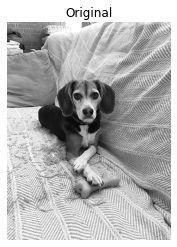

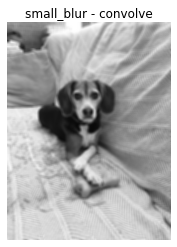

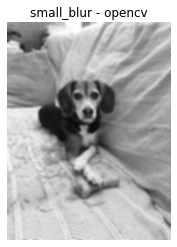

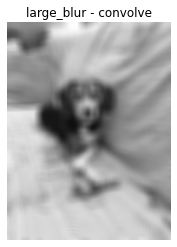

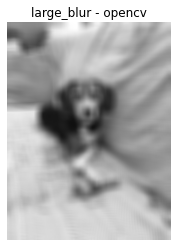

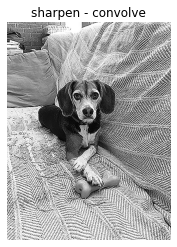

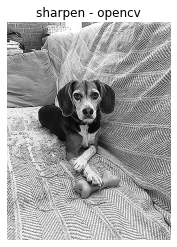

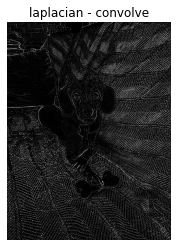

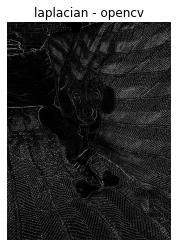

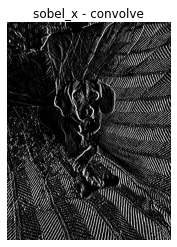

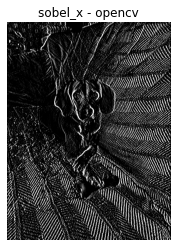

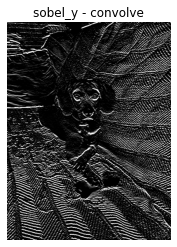

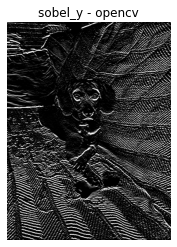

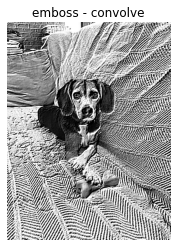

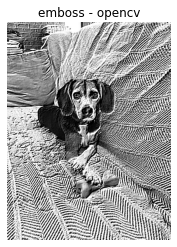

In [ ]:
apply_convolve("drive/MyDrive/pyimagesearch/datasets/jemma.png")